In [104]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Training Data
players = pd.read_csv('Players.csv')
player_data = pd.read_csv('player_data.csv')
season_stats = pd.read_csv('Seasons_Stats.csv')
season_stats = season_stats.drop(['blanl', 'blank2', 'Unnamed: 0'], axis=1)
season_stats = season_stats[season_stats.Tm.str.contains('TOT') == False]
# Maybe use this for classification?
# season_stats['MVP_Candidate'] = np.where(season_stats['MVPSHARES'] > 0, 1, 0)
season_stats['Player'] = season_stats['Player'].astype(str).str.replace('*', '')
season_stats['PPG'] = season_stats['PTS'] / season_stats['G']
season_stats['ASTPG'] = season_stats['AST'] / season_stats['G']
season_stats['STLPG'] = season_stats['STL'] / season_stats['G']
season_stats['BLKPG'] = season_stats['BLK'] / season_stats['G']
season_stats['PFPG'] = season_stats['PF'] / season_stats['G']
season_stats['TRPG'] = season_stats['TRB'] / season_stats['G']
# season_stats['ORPG'] = season_stats['ORB'] / season_stats['G']
# season_stats['DRPG'] = season_stats['DRB'] / season_stats['G']
season_stats['MPPG'] = season_stats['MP'] / season_stats['G']
season_stats = season_stats.drop(['PTS', 'AST', 'STL', 'BLK', 'PF', 'TRB', 'ORB', 'DRB', 'MP',
                                 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'FG%', '3P%', 'eFG%',
                                 '2P%', 'WS', 'ORB%', 'DRB%', 'WS/48', 'TRB%', 'AST%', 'STL%', 
                                'BLK%', 'USG%', 'OWS', 'VORP'], axis=1)
season_stats = season_stats[season_stats['G'] >= 41.0]
season_stats = season_stats[season_stats['MPPG'] >= 25.0]
season_stats = season_stats.dropna()

In [106]:
season_stats.head()

,Year,Decade,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,FTr,TOV%,DWS,OBPM,DBPM,BPM,FT%,TOV,MVPSHARES,MVP,TMWL%,PPG,ASTPG,STLPG,BLKPG,PFPG,TRPG,MPPG
5730,1980.0,80's,Tiny Archibald,PG,31.0,BOS,80.0,80.0,15.3,0.574,0.023,0.548,19.7,2.9,1.1,-1.1,0.0,0.830,242.0,0.0,0,0.744,14.137500,8.387500,1.325000,0.125000,2.725000,2.462500,35.800000
5748,1980.0,80's,Larry Bird,PF,23.0,BOS,82.0,82.0,20.5,0.538,0.098,0.246,14.0,5.6,2.7,2.6,5.3,0.836,263.0,0.0,0,0.744,21.280488,4.512195,1.743902,0.646341,3.402439,10.390244,36.036585
5802,1980.0,80's,Dave Cowens,C,31.0,BOS,66.0,55.0,14.8,0.477,0.013,0.131,9.9,3.6,-0.7,2.0,1.4,0.779,108.0,0.0,0,0.744,14.242424,3.121212,1.045455,0.924242,3.272727,8.090909,32.712121
5835,1980.0,80's,Chris Ford,SG,31.0,BOS,73.0,73.0,13.0,0.537,0.231,0.161,12.2,2.6,1.4,0.8,2.2,0.754,105.0,0.0,0,0.744,11.178082,2.945205,1.520548,0.369863,2.438356,2.479452,28.972603
5950,1980.0,80's,Cedric Maxwell,SF,24.0,BOS,80.0,80.0,19.0,0.679,0.000,0.739,18.8,3.9,3.7,1.7,5.4,0.787,230.0,0.0,0,0.744,16.875000,2.487500,0.950000,0.762500,3.325000,8.800000,34.300000


In [107]:
mvp = season_stats[season_stats['MVP'] == 1]
mvp_candidate = season_stats[season_stats['MVPSHARES'] > 0]
mvp['Decade']
mvp_80 = mvp[(mvp['Year'] >= 1980.0) & (mvp['Year'] < 1990.0)]
mvp_90 = mvp[(mvp['Year'] >= 1990.0) & (mvp['Year'] < 2000.0)]
mvp_00 = mvp[(mvp['Year'] >= 2000.0) & (mvp['Year'] < 2010.0)]
mvp_10 = mvp[mvp['Year'] >= 2010.0]

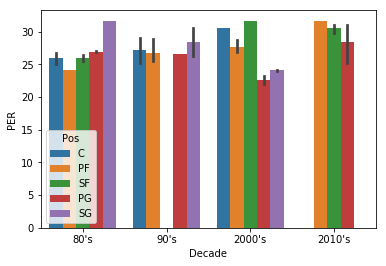

In [108]:
ax = sns.barplot(x='Decade', y='PER', hue='Pos', data=mvp)

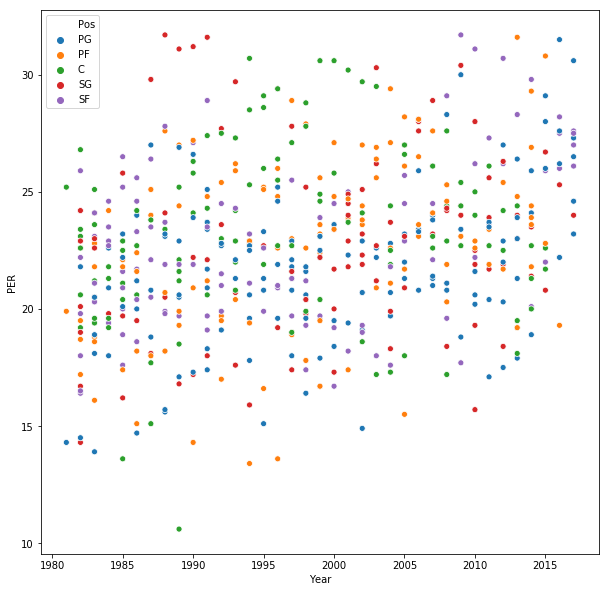

In [109]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Year', y='PER', hue='Pos', data=mvp_candidate)

In [110]:
season_stats[season_stats['Player'] == 'Kareem Abdul-Jabbar']

,Year,Decade,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,FTr,TOV%,DWS,OBPM,DBPM,BPM,FT%,TOV,MVPSHARES,MVP,TMWL%,PPG,ASTPG,STLPG,BLKPG,PFPG,TRPG,MPPG
6449,1982.0,80's,Kareem Abdul-Jabbar,C,34.0,LAL,76.0,76.0,23.4,0.608,0.002,0.340,13.3,3.9,2.9,1.4,4.3,0.706,230.0,0.045,0,0.695,23.921053,2.960526,0.828947,2.723684,2.947368,8.671053,35.223684
6823,1983.0,80's,Kareem Abdul-Jabbar,C,35.0,LAL,79.0,79.0,23.6,0.619,0.002,0.302,12.6,2.9,3.6,0.3,3.8,0.749,200.0,0.020,0,0.707,21.797468,2.531646,0.772152,2.151899,2.784810,7.493671,32.329114
7215,1984.0,80's,Kareem Abdul-Jabbar,C,36.0,LAL,80.0,80.0,21.3,0.608,0.001,0.318,13.5,3.1,2.4,0.4,2.8,0.723,221.0,0.201,0,0.659,21.462500,2.637500,0.687500,1.787500,2.637500,7.337500,32.775000
7559,1985.0,80's,Kareem Abdul-Jabbar,C,37.0,LAL,79.0,79.0,22.9,0.628,0.001,0.327,12.5,3.6,3.6,1.3,4.9,0.732,197.0,0.264,0,0.756,21.962025,3.151899,0.797468,2.050633,3.012658,7.873418,33.291139
7922,1986.0,80's,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,22.7,0.603,0.001,0.328,11.7,3.2,3.7,0.8,4.5,0.765,203.0,0.173,0,0.756,23.367089,3.544304,0.848101,1.645570,3.139241,6.050633,33.278481
8302,1987.0,80's,Kareem Abdul-Jabbar,C,39.0,LAL,78.0,78.0,17.9,0.597,0.003,0.345,14.0,3.0,1.2,0.4,1.6,0.714,186.0,0.000,0,0.793,17.512821,2.602564,0.628205,1.243590,3.141026,6.705128,31.294872
8681,1988.0,80's,Kareem Abdul-Jabbar,C,40.0,LAL,80.0,80.0,15.8,0.570,0.001,0.298,13.5,2.7,-0.8,0.2,-0.6,0.762,159.0,0.000,0,0.756,14.562500,1.687500,0.600000,1.150000,2.700000,5.975000,28.850000


In [111]:
# Test Data
season_2018 = pd.read_csv('2018_season.csv')
season_2018 = season_2018.drop(['blanl', 'blank2'], axis=1)
season_2018 = season_2018[season_2018.Tm.str.contains('TOT') == False]
# Maybe use this for classification?
# season_2018['MVP_Candidate'] = np.where(season_2018['MVPSHARES'] > 0, 1, 0)
season_2018['Player'] = season_2018['Player'].astype(str).str.replace('*', '')
season_2018['PPG'] = season_2018['PTS'] / season_2018['G']
season_2018['ASTPG'] = season_2018['AST'] / season_2018['G']
season_2018['STLPG'] = season_2018['STL'] / season_2018['G']
season_2018['BLKPG'] = season_2018['BLK'] / season_2018['G']
season_2018['PFPG'] = season_2018['PF'] / season_2018['G']
season_2018['TRPG'] = season_2018['TRB'] / season_2018['G']
# season_2018['ORPG'] = season_2018['ORB'] / season_2018['G']
# season_2018['DRPG'] = season_2018['DRB'] / season_2018['G']
season_2018['MPPG'] = season_2018['MP'] / season_2018['G']
season_2018 = season_2018.drop(['PTS', 'AST', 'STL', 'BLK', 'PF', 'TRB', 'ORB', 'DRB', 'MP',
                                 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'FG%', '3P%', 'eFG%',
                                 '2P%', 'WS', 'ORB%', 'DRB%', 'WS/48', 'TRB%', 'AST%', 'STL%', 
                                'BLK%', 'USG%', 'OWS', 'VORP'], axis=1)
season_2018 = season_2018[season_2018['G'] >= 41.0]
season_2018 = season_2018[season_2018['MPPG'] >= 25.0]
season_2018 = season_2018.dropna()

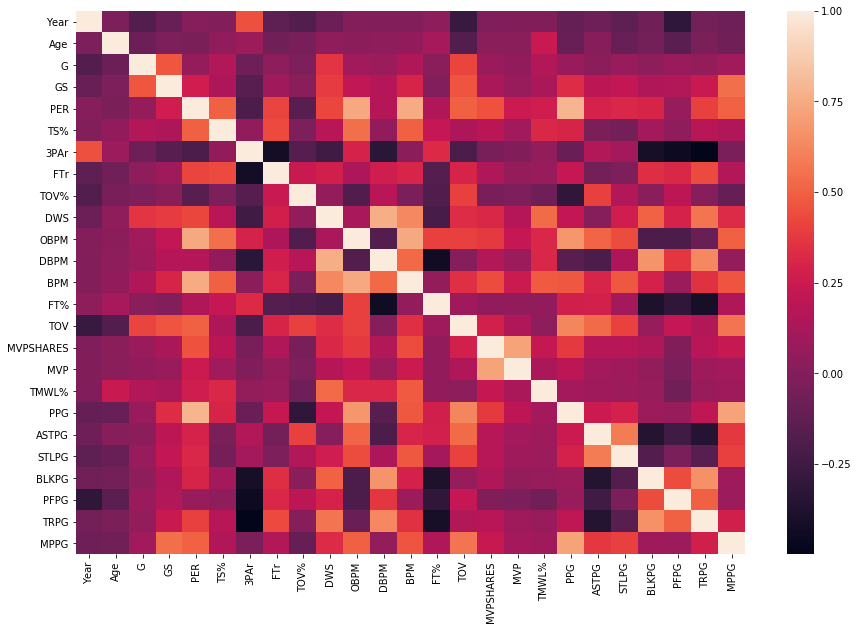

In [119]:
corrmap = season_stats.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corrmap)

In [120]:
from sklearn.model_selection import train_test_split
y = season_stats['MVPSHARES']
X = season_stats.drop(['Player','Tm', 'Pos','MVP', 'MVPSHARES', 'Year'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [121]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [122]:
# Drop features 
X.drop(X.columns[to_drop], axis=1)

,Decade,Age,G,GS,PER,TS%,3PAr,FTr,TOV%,DWS,OBPM,DBPM,BPM,FT%,TOV,TMWL%,PPG,ASTPG,STLPG,BLKPG,PFPG,TRPG,MPPG
5730,80's,31.0,80.0,80.0,15.3,0.574,0.023,0.548,19.7,2.9,1.1,-1.1,0.0,0.830,242.0,0.744,14.137500,8.387500,1.325000,0.125000,2.725000,2.462500,35.800000
5748,80's,23.0,82.0,82.0,20.5,0.538,0.098,0.246,14.0,5.6,2.7,2.6,5.3,0.836,263.0,0.744,21.280488,4.512195,1.743902,0.646341,3.402439,10.390244,36.036585
5802,80's,31.0,66.0,55.0,14.8,0.477,0.013,0.131,9.9,3.6,-0.7,2.0,1.4,0.779,108.0,0.744,14.242424,3.121212,1.045455,0.924242,3.272727,8.090909,32.712121
5835,80's,31.0,73.0,73.0,13.0,0.537,0.231,0.161,12.2,2.6,1.4,0.8,2.2,0.754,105.0,0.744,11.178082,2.945205,1.520548,0.369863,2.438356,2.479452,28.972603
5950,80's,24.0,80.0,80.0,19.0,0.679,0.000,0.739,18.8,3.9,3.7,1.7,5.4,0.787,230.0,0.744,16.875000,2.487500,0.950000,0.762500,3.325000,8.800000,34.300000
6091,80's,32.0,80.0,72.0,14.3,0.582,0.012,0.547,21.8,2.3,0.4,-1.6,-1.3,0.816,265.0,0.756,13.825000,7.725000,0.937500,0.225000,2.512500,2.200000,35.250000
6100,80's,24.0,82.0,82.0,19.9,0.528,0.049,0.218,14.9,6.1,2.1,3.0,5.1,0.863,289.0,0.756,21.231707,5.500000,1.963415,0.768293,2.914634,10.914634,39.500000
6182,80's,32.0,82.0,75.0,8.8,0.488,0.154,0.123,14.6,2.4,-0.7,0.2,-0.5,0.736,127.0,0.756,8.878049,3.597561,1.219512,0.280488,2.585366,1.987805,33.207317
6302,80's,25.0,81.0,81.0,17.6,0.651,0.001,0.600,16.0,3.3,3.5,1.3,4.8,0.782,180.0,0.756,15.234568,2.703704,0.975309,0.839506,3.160494,6.481481,33.703704
6343,80's,27.0,82.0,78.0,25.2,0.579,0.001,0.340,12.5,4.9,2.7,2.3,5.0,0.710,191.0,0.756,18.926829,1.756098,0.987805,2.609756,3.780488,9.475610,28.024390


In [123]:
high_corr_var = np.where(corrmap>0.8)
high_corr_var=[(corrmap.index[x],corrmap.columns[y]) 
               for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[]

In [124]:
from sklearn.ensemble import RandomForestRegressor
X_train = X_train.drop(['Decade'], axis=1)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [125]:
importance = pd.DataFrame()
importance['features'] = X_train.columns
importance['scores'] = rf.feature_importances_

importance.sort_values('scores', ascending=False)

,features,scores
3,PER,0.425757
14,TMWL%,0.131493
11,BPM,0.085542
13,TOV,0.044492
21,MPPG,0.042662
15,PPG,0.039582
8,DWS,0.032885
12,FT%,0.020953
16,ASTPG,0.020704
19,PFPG,0.019625


In [127]:
rf.score(X_test.drop(['Decade'], axis=1),y_test)

0.7509542287977929

In [139]:
season_2017 = season_stats[season_stats["Year"] == 2017.0]

In [129]:
test_pred = rf.predict(season_2018.drop(['Player','Tm', 'Pos','MVP', 'MVPSHARES', 'Year'], axis=1))
test_results = pd.DataFrame(season_2018.Player)
test_results['score'] = test_pred
test_results['Year'] = season_2018['Year']
test_results['Share'] = season_2018['MVPSHARES']
test_results['MVP'] = season_2018['MVP']

In [130]:
test_results.sort_values('score', ascending=False).head()

,Player,score,Year,Share,MVP
232,James Harden,0.681716,2018,0.955,1
303,LeBron James,0.399101,2018,0.731,0
146,Stephen Curry,0.345859,2018,0.005,0
488,Chris Paul,0.241702,2018,0.000,0
625,Russell Westbrook,0.199394,2018,0.075,0


In [141]:
test_pred = rf.predict(season_2017.drop(['Player','Tm', 'Pos','MVP', 'MVPSHARES', 'Year', 'Decade'], axis=1))
test_results = pd.DataFrame(season_2017.Player)
test_results['score'] = test_pred
test_results['Year'] = season_2017['Year']
test_results['Share'] = season_2017['MVPSHARES']
test_results['MVP'] = season_2017['MVP']

In [142]:
test_results.sort_values('score', ascending=False).head()

,Player,score,Year,Share,MVP
24654,Russell Westbrook,0.735853,2017.0,0.879,1
24306,James Harden,0.647104,2017.0,0.746,0
24414,Kawhi Leonard,0.445176,2017.0,0.495,0
24365,LeBron James,0.351861,2017.0,0.330,0
24216,Stephen Curry,0.265212,2017.0,0.051,0


In [53]:
importance = pd.DataFrame()
importance['features'] = X_train.columns
importance['scores'] = rf.feature_importances_

importance.sort_values('scores', ascending=False).head(25)

,features,scores
18,WS,0.367853
4,PER,0.137959
15,USG%,0.049620
19,WS/48,0.047361
17,DWS,0.038848
30,PPG,0.028058
34,PFPG,0.025290
7,FTr,0.022562
23,VORP,0.020107
22,BPM,0.015585


3.3578604712815815e-05

In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('Score? \n', regr.score(X_test, y_test))

Coefficients: 
 [ 2.44137144e-04 -8.55058658e-05 -2.39700560e-03 -6.23910303e-05
  3.18442949e-03 -1.57070666e+00 -2.62999800e-02  6.45775109e-02
 -2.17929570e-02 -1.91457149e-02  3.87837942e-02 -6.51875478e-04
  2.36963460e-02 -1.91300882e-02  3.39035446e-03 -4.71790649e-03
  3.17676282e-02  1.93219512e-02 -6.91815731e-03 -4.30065614e-01
 -5.56022032e-02 -4.03594575e-02  2.72285914e-02  4.50355316e-02
 -4.12745489e-01 -3.10863766e-02  5.62736152e-02  1.13016105e+00
  5.99447786e-02  1.47649686e-04  1.19801491e-02  1.00749275e-03
 -5.81792310e-02  3.48619758e-02 -9.12502190e-03 -1.27176731e-03
 -1.10373758e-02]
Intercept: 
 0.21916093803892298
Score? 
 0.4489810629108056


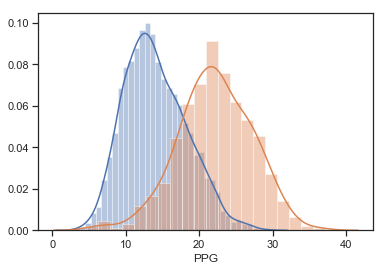

In [63]:
mvps = season_stats[season_stats['MVPSHARES'] > 0]
not_mvps = season_stats[season_stats['MVPSHARES'] == 0]

fig, ax = plt.subplots()
sns.distplot(not_mvps['PPG'], ax=ax)
sns.distplot(mvps['PPG'], ax=ax)

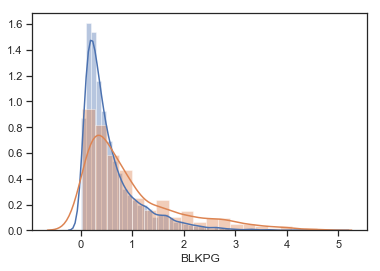

In [64]:
fig, ax = plt.subplots()
sns.distplot(not_mvps['BLKPG'], ax=ax)
sns.distplot(mvps['BLKPG'], ax=ax)

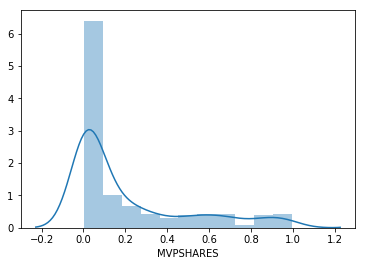

In [128]:
sns.distplot(mvps['MVPSHARES'])

In [179]:
season_2018 = pd.read_csv('2018_season.csv')

In [180]:
season_2018.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVPSHARES
0,NaN,2018,Alex Abrines,SG,24,OKC,75,8,1134,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,0,1.3,1.0,2.2,0.094,0,-0.5,-1.7,-2.2,-0.1,115,291,0.395,84,221,0.380,31,70,0.443,0.540,39,46,0.848,26,88,114,28,38,8,25,124,353,0.0
1,NaN,2018,Quincy Acy,PF,27,BRK,70,8,1359,8.2,0.525,0.800,0.164,3.1,17.0,10.0,6.0,1.2,1.6,13.3,14.4,0,-0.1,1.1,1.0,0.036,0,-2.0,-0.2,-2.2,-0.1,130,365,0.356,102,292,0.349,28,73,0.384,0.496,49,60,0.817,40,217,257,57,33,29,60,149,411,0.0
2,NaN,2018,Steven Adams,C,24,OKC,76,76,2487,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.2,16.7,0,6.7,3.0,9.7,0.187,0,2.2,1.1,3.3,3.3,448,712,0.629,0,2,0.000,448,710,0.631,0.629,160,286,0.559,384,301,685,88,92,78,128,215,1056,0.0
3,NaN,2018,Bam Adebayo,C,20,MIA,69,19,1368,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,0,2.3,1.9,4.2,0.148,0,-1.6,1.8,0.2,0.8,174,340,0.512,0,7,0.000,174,333,0.523,0.512,129,179,0.721,118,263,381,101,32,41,66,138,477,0.0
4,NaN,2018,Arron Afflalo,SG,32,ORL,53,3,682,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,0,-0.1,0.2,0.1,0.009,0,-4.1,-1.8,-5.8,-0.7,65,162,0.401,27,70,0.386,38,92,0.413,0.485,22,26,0.846,4,62,66,30,4,9,21,56,179,0.0


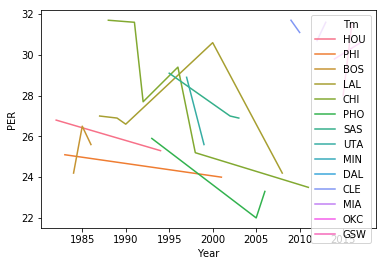

In [21]:
sns.lineplot(x='Year', y='PER', hue='Tm', data=mvp)